In [7]:
from qibo.cskim_utils.circuit_info import count_czs_qibo
from qibo.cskim_utils.gen_circuit import gen_transpiled_circuits_qibo
from qibo.transpiler.placer import ReverseTraversal
from qibo.cskim_utils.connectivity import cycle_connectivity_nx, star_connectivity
from qibo.cskim_utils.gen_circuit import random_control_circuit_qibo
from qibo.models import QFT
from qibo.transpiler.router import Sabre, ShortestPaths
from matplotlib import pyplot as plt
import networkx as nx

# Comparison of Sabre and ShortestPaths on different connectivity graphs/circuits

### Utils

In [13]:
def fluctuation_test_qibo(repeat, circuit, conn, router):
    """
    Fluctuation test
    Placer: ReverseTraversal
    Routing: Sabre / ShortestPaths
    Circuit: QFT / Random Control Circuit
    Connectivity: Cycle / Star
    """

    # List of #CZs after each transpilation
    results = []
    placer = ReverseTraversal(connectivity=conn, routing_algorithm=router)

    for i in range(repeat):
        # Qibo Transpilation
        transpiled_circ = gen_transpiled_circuits_qibo(circuit, conn, placer, router)
        czs_qb = count_czs_qibo(transpiled_circ)
        results.append(czs_qb)

    return results

## Settings

In [14]:
nqubits = 5

# Circuits
qft_circ = QFT(nqubits)
random_circ = random_control_circuit_qibo(nqubits, 10)

# Connectivity
conn_star = star_connectivity()
conn_cycle = cycle_connectivity_nx(nqubits)

# Router
rt_sabre = Sabre(connectivity=conn_star)
rt_shortestpth = ShortestPaths(connectivity=conn_cycle)

QFT(5)
q0: ─H─U1─U1─U1─U1───────────────────────────x───
q1: ───o──|──|──|──H─U1─U1─U1────────────────|─x─
q2: ──────o──|──|────o──|──|──H─U1─U1────────|─|─
q3: ─────────o──|───────o──|────o──|──H─U1───|─x─
q4: ────────────o──────────o───────o────o──H─x───

Random Circuit (#CZs = 10)
q0: ───o─o─Z─o───────Z───
q1: ─Z─|─|─|─|─o─Z───|─o─
q2: ─o─|─|─|─|─|─|───o─|─
q3: ───|─|─o─|─|─o─o───Z─
q4: ───Z─Z───Z─Z───Z─────

Star Connectivity


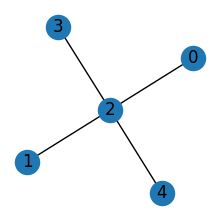


Cycle Connectivity


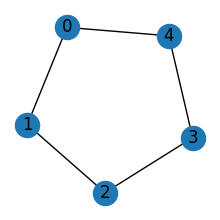

In [16]:
print("QFT(5)")
print(qft_circ.draw(line_wrap=1000))
print("\nRandom Circuit (#CZs = 10)")
print(random_circ.draw(line_wrap=1000))

print("\nStar Connectivity")
plt.figure(figsize=(2, 2)) 
nx.draw(conn_star, with_labels=True)
plt.show()
print("\nCycle Connectivity")
plt.figure(figsize=(2, 2))
nx.draw(conn_cycle, with_labels=True)
plt.show()

## Transpilation

- `repeat` = 50

In [18]:
repeat = 50

# QFT(5) | Star/Cycle | Sabre/ShortestPaths
res1_star_sabre = fluctuation_test_qibo(repeat, qft_circ, conn_star, rt_sabre)
res1_star_shortestpth = fluctuation_test_qibo(repeat, qft_circ, conn_star, rt_shortestpth)
res1_cycle_sabre = fluctuation_test_qibo(repeat, qft_circ, conn_cycle, rt_sabre)
res1_cycle_shortestpth = fluctuation_test_qibo(repeat, qft_circ, conn_cycle, rt_shortestpth)

# Random Circuit (#CZs = 10) | Star/Cycle | Sabre/ShortestPaths
res2_star_sabre = fluctuation_test_qibo(repeat, random_circ, conn_star, rt_sabre)
res2_star_shortestpth = fluctuation_test_qibo(repeat, random_circ, conn_star, rt_shortestpth)
res2_cycle_sabre = fluctuation_test_qibo(repeat, random_circ, conn_cycle, rt_sabre)
res2_cycle_shortestpth = fluctuation_test_qibo(repeat, random_circ, conn_cycle, rt_shortestpth)

## Results

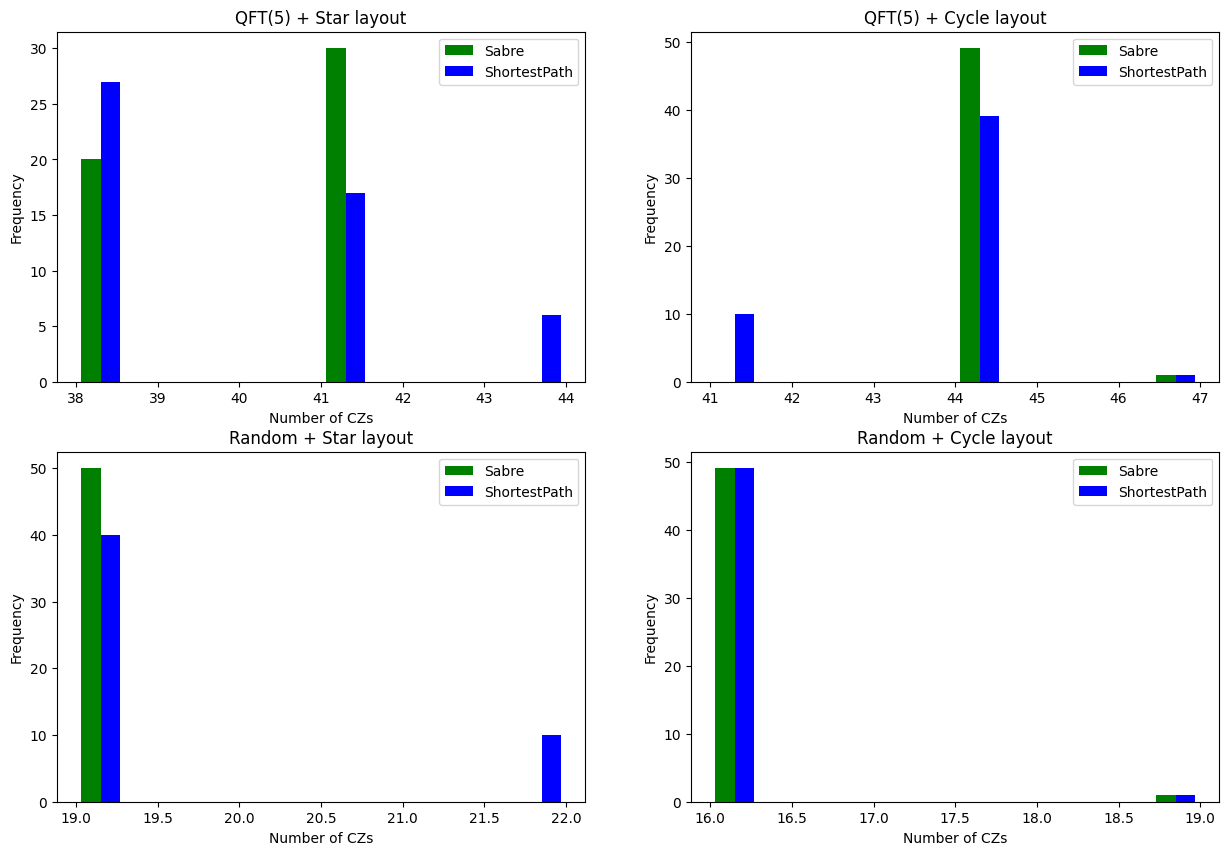

In [23]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].hist([res1_star_sabre, res1_star_shortestpth], bins=10, color=['g', 'b'], label=['Sabre', 'ShortestPath'])
axes[0, 0].legend()
axes[0, 0].set_xlabel("Number of CZs")
axes[0, 0].set_ylabel("Frequency")
axes[0, 0].set_title("QFT(5) + Star layout")

axes[0, 1].hist([res1_cycle_sabre, res1_cycle_shortestpth], bins=10, color=['g', 'b'], label=['Sabre', 'ShortestPath'])
axes[0, 1].legend()
axes[0, 1].set_xlabel("Number of CZs")
axes[0, 1].set_ylabel("Frequency")
axes[0, 1].set_title("QFT(5) + Cycle layout")

axes[1, 0].hist([res2_star_sabre, res2_star_shortestpth], bins=10, color=['g', 'b'], label=['Sabre', 'ShortestPath'])
axes[1, 0].legend()
axes[1, 0].set_xlabel("Number of CZs")
axes[1, 0].set_ylabel("Frequency")
axes[1, 0].set_title("Random + Star layout")

axes[1, 1].hist([res2_cycle_sabre, res2_cycle_shortestpth], bins=10, color=['g', 'b'], label=['Sabre', 'ShortestPath'])
axes[1, 1].legend()
axes[1, 1].set_xlabel("Number of CZs")
axes[1, 1].set_ylabel("Frequency")
axes[1, 1].set_title("Random + Cycle layout")

plt.show()


In [26]:
print("Average #CZs for QFT(5) + Star layout + Sabre: ", sum(res1_star_sabre)/repeat)
print("Average #CZs for QFT(5) + Star layout + ShortestPaths: ", sum(res1_star_shortestpth)/repeat)

Average #CZs for QFT(5) + Star layout + Sabre:  39.8
Average #CZs for QFT(5) + Star layout + ShortestPaths:  39.74
